In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)        # Show all rows
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.width', None)           # Auto-detect display width
pd.set_option('display.max_colwidth', None)    # Show full content in each cell


## Nạp vào và thống kê tổng quan bộ dữ liệu

In [2]:
#Đọc bộ dữ liệu
df = pd.read_csv('../Data/Team_stats_Tournamennts.csv')
df.head(2)

,gameid,datacompleteness,league,year,split,playoffs,date,game,patch,participantid,side,position,teamname,teamid,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,gpr,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,goldat20,xpat20,csat20,opp_goldat20,opp_xpat20,opp_csat20,golddiffat20,xpdiffat20,csdiffat20,killsat20,assistsat20,deathsat20,opp_killsat20,opp_assistsat20,opp_deathsat20,goldat25,xpat25,csat25,opp_goldat25,opp_xpat25,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,100,Blue,team,Team BDS,oe:team:7338408a0fe0217451d2c9a567db999,Draven,Bel'Veth,LeBlanc,Jax,Poppy,Kalista,Nocturne,Akali,Pyke,Renekton,1749,0,10,14,11,10,14,0.0,0.0,0.0,0.0,1.0,0.3431,0.8233,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,1.0,1.0,3.0,9.0,1.0,1.0,8.0,5.0,0.0,2.0,35171,1206.5523,3303.8765,2168.5763,116,3.9794,54,1.8525,31,273,9.3654,51656,32438,1112.7959,50075,-0.010825,1.05,793.0,212,34.4768,17959.0,18342.0,320.0,17077.0,18109.0,323.0,882.0,233.0,-3.0,5.0,5.0,4.0,4.0,6.0,5.0,27653.0,28686.0,509.0,25924.0,29282.0,514.0,1729.0,-596.0,-5.0,6.0,7.0,5.0,5.0,8.0,6.0,36502.0,40338.0,724.0,34086.0,40490.0,717.0,2416.0,-152.0,7.0,6.0,7.0,5.0,5.0,8.0,6.0,45581.0,53080.0,904.0,44394.0,55632.0,899.0,1187.0,-2552.0,5.0,9.0,10.0,7.0,7.0,12.0,9.0
1,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,200,Red,team,G2 Esports,oe:team:7d6673d3a9d00363c6bebc1a630da6e,Caitlyn,Ashe,Rumble,Blitzcrank,Bard,Neeko,Aphelios,Renata Glasc,Vi,Gwen,1749,1,14,10,26,14,10,4.0,0.0,0.0,0.0,0.0,0.4803,0.8233,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,9.0,3.0,0.0,0.0,5.0,8.0,2.0,0.0,66376,2277.0497,2128.2333,2434.1681,109,3.7393,48,1.6467,32,218,7.4786,56807,37589,1289.5026,50620,0.010825,-1.05,825.0,191,34.8542,17077.0,18109.0,323.0,17959.0,18342.0,320.0,-882.0,-233.0,3.0,4.0,6.0,5.0,5.0,5.0,4.0,25924.0,29282.0,514.0,27653.0,28686.0,509.0,-1729.0,596.0,5.0,5.0,8.0,6.0,6.0,7.0,5.0,34086.0,40490.0,717.0,36502.0,40338.0,724.0,-2416.0,152.0,-7.0,5.0,8.0,6.0,6.0,7.0,5.0,44394.0,55632.0,899.0,45581.0,53080.0,904.0,-1187.0,2552.0,-5.0,7.0,12.0,9.0,9.0,10.0,7.0


In [3]:
df.dtypes

gameid                       object
datacompleteness             object
league                       object
year                          int64
split                        object
playoffs                      int64
date                         object
game                          int64
patch                       float64
participantid                 int64
side                         object
position                     object
teamname                     object
teamid                       object
ban1                         object
ban2                         object
ban3                         object
ban4                         object
ban5                         object
pick1                        object
pick2                        object
pick3                        object
pick4                        object
pick5                        object
gamelength                    int64
result                        int64
kills                         int64
deaths                      

**Vì số lượng đặc trưng là rất lớn (148 cột). Bọn em thống nhất quyết định rằng ở đồ án cuối kỳ này, bọn em sẽ chỉ tập trung vào phân tích theo 1 giải đấu duy nhất là giải LCK.**

In [4]:
#Lọc dữ liệu theo giải LCK 
lck_df = df[df['league'] =='LCK']
lck_df.head(2)

,gameid,datacompleteness,league,year,split,playoffs,date,game,patch,participantid,side,position,teamname,teamid,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,gpr,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,goldat20,xpat20,csat20,opp_goldat20,opp_xpat20,opp_csat20,golddiffat20,xpdiffat20,csdiffat20,killsat20,assistsat20,deathsat20,opp_killsat20,opp_assistsat20,opp_deathsat20,goldat25,xpat25,csat25,opp_goldat25,opp_xpat25,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
38,LOLTMNT02_22165,complete,LCK,2024,Spring,0,2024-01-17 08:20:00,1,14.01,100,Blue,team,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,K'Sante,Kalista,LeBlanc,Skarner,Sejuani,Lucian,Orianna,Nami,Poppy,Udyr,2507,0,14,14,28,14,14,0.0,0.0,0.0,0.0,1.0,0.3351,0.6701,0.0,3.0,4.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,3.0,1.0,3.0,9.0,0.0,1.0,6.0,1.0,0.0,2.0,107963,2583.8771,3484.7387,5798.1013,139,3.3267,71,1.6992,53,357,8.5441,72714,45765,1095.2932,71150,-0.004781,1.1,1136.0,195,31.8548,16277.0,19016.0,360.0,14694.0,18973.0,317.0,1583.0,43.0,43.0,1.0,1.0,0.0,0.0,0.0,1.0,26441.0,30529.0,562.0,22526.0,29121.0,488.0,3915.0,1408.0,74.0,3.0,3.0,1.0,1.0,1.0,3.0,35781.0,43117.0,759.0,30979.0,41284.0,687.0,4802.0,1833.0,72.0,5.0,4.0,2.0,2.0,3.0,5.0,44062.0,53314.0,881.0,42714.0,56073.0,843.0,1348.0,-2759.0,38.0,8.0,13.0,5.0,5.0,10.0,8.0
39,LOLTMNT02_22165,complete,LCK,2024,Spring,0,2024-01-17 08:20:00,1,14.01,200,Red,team,Nongshim RedForce,oe:team:5cd2cd09ec94296f605dd13a2924d6c,Ashe,Varus,Vi,Nocturne,Lee Sin,Milio,Azir,Aphelios,Jax,Gnar,2507,1,14,14,32,14,14,1.0,0.0,0.0,0.0,0.0,0.3351,0.6701,1.0,4.0,3.0,4.0,3.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,9.0,3.0,1.0,0.0,1.0,6.0,2.0,0.0,119941,2870.5465,3444.5313,3839.4974,154,3.6857,68,1.6274,69,370,8.8552,78964,52015,1244.8744,71491,0.004781,-1.1,1124.0,260,33.1233,14694.0,18973.0,317.0,16277.0,19016.0,360.0,-1583.0,-43.0,-43.0,0.0,0.0,1.0,1.0,1.0,0.0,22526.0,29121.0,488.0,26441.0,30529.0,562.0,-3915.0,-1408.0,-74.0,1.0,1.0,3.0,3.0,3.0,1.0,30979.0,41284.0,687.0,35781.0,43117.0,759.0,-4802.0,-1833.0,-72.0,2.0,3.0,5.0,5.0,4.0,2.0,42714.0,56073.0,843.0,44062.0,53314.0,881.0,-1348.0,2759.0,-38.0,5.0,10.0,8.0,8.0,13.0,5.0


In [5]:
lck_df.to_csv('../Data/LCK_Tournament.csv')

In [18]:
# 1. Thống kê các cột cơ bản về trận đấu
game_basic_cols = ['gameid', 'league', 'year', 'split', 'playoffs', 'date', 'game', 'patch', 'gamelength', 'result']

# 2. Thống kê về đội (Team Identity)
team_identity_cols = ['participantid', 'side', 'position', 'teamname', 'teamid']

# 3. Thống kê về picks & bans
draft_cols = ['ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5']

# 4. Thống kê về KDA và combat
combat_cols = ['kills', 'deaths', 'assists', 'teamkills', 'teamdeaths', 'doublekills', 
               'triplekills', 'quadrakills', 'pentakills', 'firstblood', 'team kpm', 'ckpm']

# 5. Thống kê về objectives
objectives_cols = ['firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes', 'opp_elementaldrakes',
                  'infernals', 'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs', 'elders',
                  'firstherald', 'heralds', 'firstbaron', 'barons']

# 6. Thống kê về towers và inhibitors
structure_cols = ['firsttower', 'towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers',
                 'turretplates', 'opp_turretplates', 'inhibitors', 'opp_inhibitors']

# 7. Thống kê về damage và vision
damage_vision_cols = ['damagetochampions', 'dpm', 'damagetakenperminute', 'damagemitigatedperminute',
                     'wardsplaced', 'wpm', 'wardskilled', 'wcpm', 'controlwardsbought', 'visionscore', 'vspm']

# 8. Thống kê về gold và resources
economy_cols = ['totalgold', 'earnedgold', 'earned gpm', 'goldspent', 'gspd', 'gpr',
                'minionkills', 'monsterkills', 'cspm']

Thực hiện phân tích thăm dò cho từng nhóm đặc trưng

### 1. Nhóm đặc trưng về các thông số cơ bản của một ván đấu

a. Thống kê số lượng ván đấu 

<Figure size 1200x600 with 0 Axes>

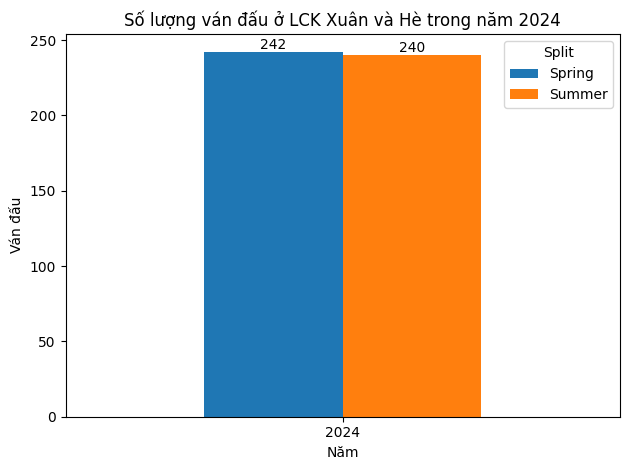

In [40]:
# Thống kê số lượng ván đấu 
plt.figure(figsize=(12, 6))
split_counts = lck_df.groupby(['year', 'split']).size().unstack(fill_value=0) // 2 
bars = split_counts.plot(kind='bar', stacked=False)
plt.title('Số lượng ván đấu ở LCK Xuân và Hè trong năm 2024')
plt.xlabel('Năm')
plt.ylabel('Ván đấu')
plt.legend(title='Split')
plt.xticks(rotation=0)

# Displaying values on top of each column
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), bar.get_height(), ha='center', va='bottom')

plt.tight_layout()
plt.show()

b. Thống kê theo số lượng trận đấu (hậu tiền xử lý)
- idea: đổi tên 'date' thành 'date_time'; tạo cột 'date' mới trích date từ 'date_time'; quy luật khả dĩ nhất là mỗi đội chỉ thi đấu 1 trận trong 1 ngày -> logic là 1 trận đấu sẽ có 2 đội trùng ít nhất là 2 gameid trong cùng 1 ngày 